# Plotting Drifters

### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

from importlib import reload

import pycuda.driver as cuda

GPU Ocean-modules:

In [2]:
from gpuocean.utils import IPythonMagic, Common, WindStress, DrifterPlotHelper, Observation
from gpuocean.SWEsimulators import CDKLM16, ModelErrorKL
from gpuocean.drifters import MLDrifterCollection, GPUDrifterCollection


In [3]:
%cuda_context_handler gpu_ctx

In [4]:
gpu_stream = cuda.Stream()

Basin utils

In [5]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from utils.BasinInit import *
from utils.BasinPlot import * 
from utils.BasinParameters import * 
from utils.BasinEnsembleInit import * 

In [6]:
grid_args = initGridSpecs(9)

In [7]:
from gpuocean.utils import Observation, DrifterPlotHelper

In [8]:
main_drifter_folder = 'drifter_data'
timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
drifter_folder = os.path.join(main_drifter_folder, 'mldrifters_' + timestamp)
sl_drifter_folder = os.path.join(main_drifter_folder, 'sldrifters_' + timestamp)


## Truth

In [9]:
truth_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/BasinTruth/2023-06-22T13_47_48"

true_trajectories = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

true_trajectories.read_pickle(os.path.join(truth_path, "truth_trajectories.pickle"))

In [10]:
true_trajectories.get_num_drifters()

9

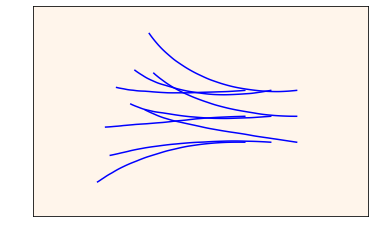

In [11]:
drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=3, padding_in_km=15)
ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])
for d in range(true_trajectories.get_num_drifters()):
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)

## SLMC ensemble

In [12]:
slmc_path = "/home/florianb/havvarsel/multilevelDA/scripts/MC/SL/2023-09-05T15_40_41"

slmc_drifter_path = os.path.join(slmc_path, "sldrifters")

slmc_trajectories = []
for f in os.listdir(slmc_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(slmc_drifter_path,f))
    
    slmc_trajectories.append(trajectory)


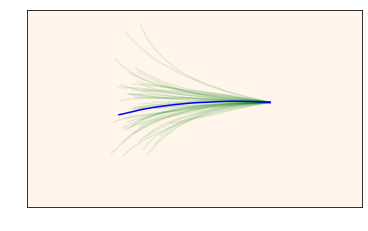

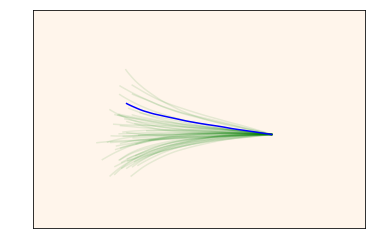

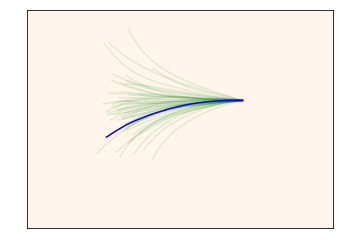

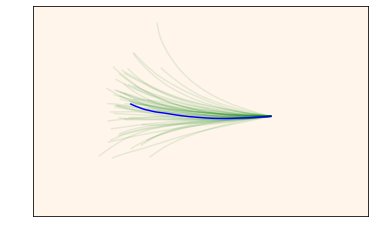

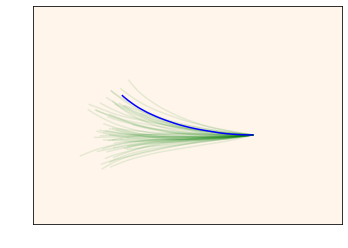

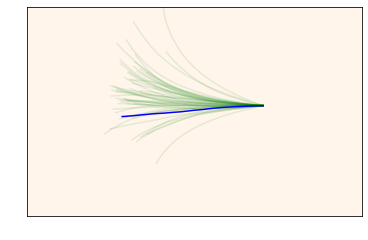

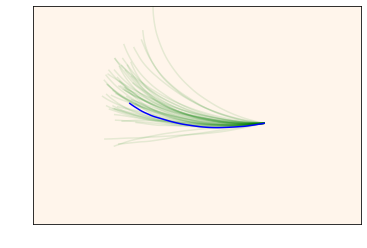

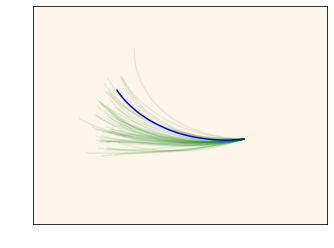

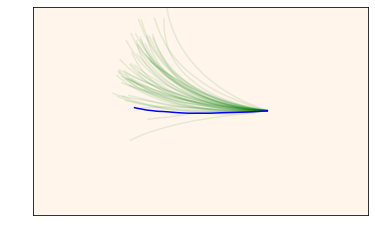

In [13]:
for d in range(true_trajectories.get_num_drifters()):
    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
    DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])
    
    DrifterPlotHelper.add_ensemble_drifter_on_background(ax, slmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)
    

## MLMC drifters

In [14]:
mlmc_path = "/home/florianb/havvarsel/multilevelDA/scripts/MC/ML/2023-09-06T08_38_06"

mlmc_drifter_path = os.path.join(mlmc_path, "mldrifters")

mlmc_trajectories = []
for f in os.listdir(mlmc_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(mlmc_drifter_path,f))
    
    mlmc_trajectories.append(trajectory)

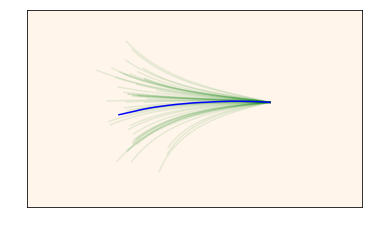

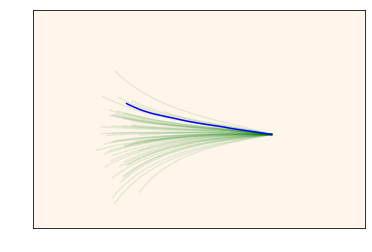

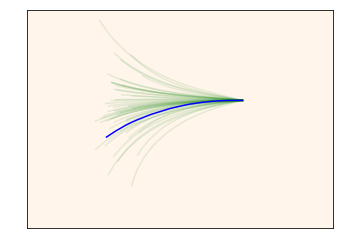

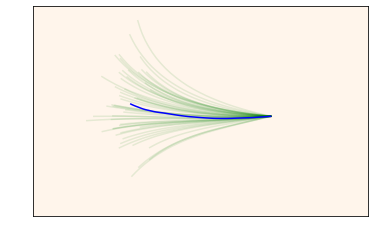

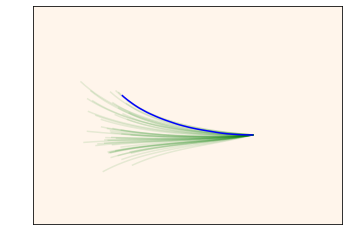

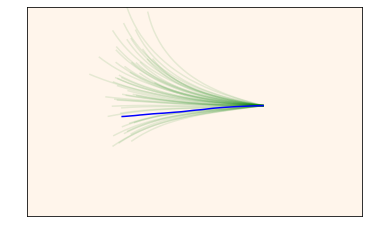

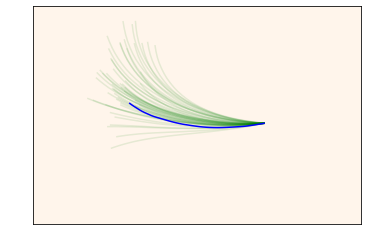

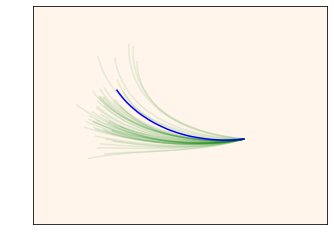

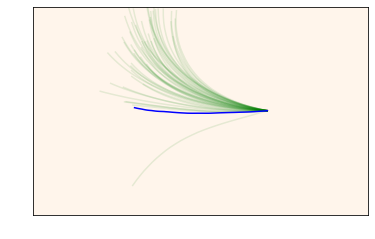

In [15]:
for d in range(true_trajectories.get_num_drifters()):
    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
    DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])
    
    DrifterPlotHelper.add_ensemble_drifter_on_background(ax, mlmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)

## SLDA drifters

In [16]:
slda_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/BasinSL/2023-09-06T10_30_05"

slda_drifter_path = os.path.join(slda_path, "sldrifters")

slda_trajectories = []
for f in os.listdir(slda_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(slda_drifter_path,f))
    
    slda_trajectories.append(trajectory)

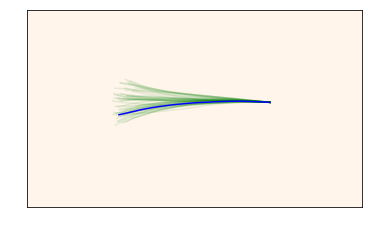

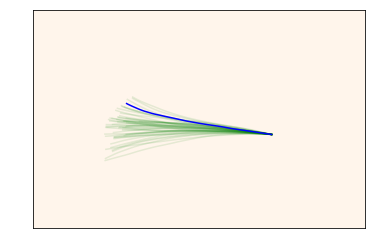

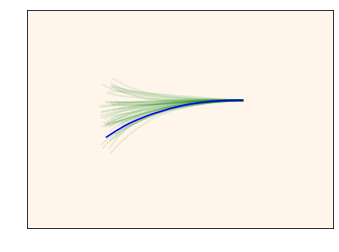

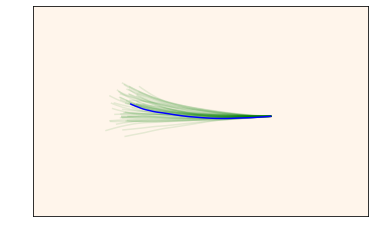

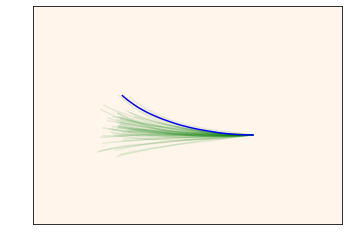

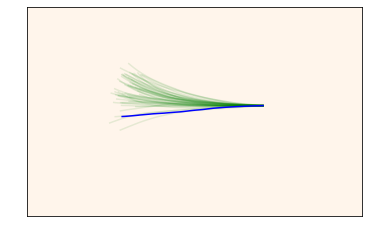

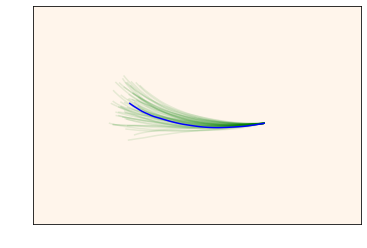

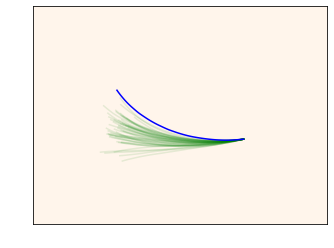

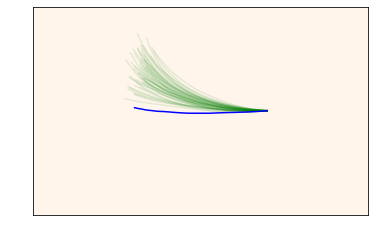

In [17]:
for d in range(true_trajectories.get_num_drifters()):
    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
    DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])

    DrifterPlotHelper.add_ensemble_drifter_on_background(ax, slda_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)

## MLDA drifters

In [ ]:
mlda_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/Basin/2023-09-06T11_30_14"

mlda_drifter_path = os.path.join(mlmc_path, "mldrifters")

mlda_trajectories = []
for f in os.listdir(mlda_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter_path,f))
    
    mlda_trajectories.append(trajectory)

In [ ]:
for d in range(true_trajectories.get_num_drifters()):
    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
    DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])
    
    DrifterPlotHelper.add_ensemble_drifter_on_background(ax, mlda_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)